#**FIFA 22** Complete Player Dataset [UPD:01/10/21]
* Metadata, attributes and ratings for 19260 players
* monetary values in Euro;
* height in cm;
* weight in kg;
* players without clubs in the Clubs column - "Free agent"
* players who are not include to national teams in the column "NationalTeam" - "Not in team"

## Načtení knihoven

In [ ]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Načtení dat do Pandas DataFrame

In [ ]:
df = pd.read_csv('players_fifa22.csv', sep=',')
pd.set_option('display.max_columns', None)
df.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,Growth,TotalStats,BaseStats,Positions,BestPosition,Club,ValueEUR,WageEUR,ReleaseClause,ClubPosition,ContractUntil,ClubNumber,ClubJoined,OnLoad,NationalTeam,NationalPosition,NationalNumber,PreferredFoot,IntReputation,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,0,2219,462,"RW,ST,CF",RW,Paris Saint-Germain,78000000,320000,144300000,RW,2023.0,30.0,2021,False,Argentina,RW,10.0,Left,5,4,4,Medium,Low,85,92,91,95,34,65,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,92,92,93,93,93,92,93,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,0,2212,460,ST,ST,FC Bayern München,119500000,270000,197200000,ST,2023.0,9.0,2014,False,Poland,ST,9.0,Right,5,4,4,High,Medium,78,92,79,85,44,82,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,92,85,88,88,88,85,89,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,0,2208,457,"ST,LW",ST,Manchester United,45000000,270000,83300000,ST,2023.0,7.0,2021,False,Portugal,ST,7.0,Right,5,4,5,High,Low,87,94,80,87,34,75,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,91,88,89,89,89,88,89,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,4,2175,470,"ST,LW",ST,Paris Saint-Germain,194000000,230000,373500000,ST,2022.0,7.0,2018,False,France,LW,10.0,Right,4,4,5,High,Low,97,88,80,92,36,77,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,91,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,2,1413,489,GK,GK,Atlético de Madrid,112000000,130000,238000000,GK,2023.0,13.0,2014,False,Not in team,NaN,NaN,Right,5,3,1,Medium,Medium,87,92,78,90,52,90,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,36,32,35,35,35,32,41,38,41,38,35,39,35,35,36,35,92


## Kontrola, jestli se v datasetu nacházejí duplikátní hodnoty

In [ ]:
df.duplicated().sum()

104

## Odstranění duplikátních hodnot

In [ ]:
df.drop_duplicates(inplace=True)

## Výběr sloupců, které nás zajímají

In [ ]:
selected_columns = ['FullName', 'Age', 'Height', 'Weight', 'Nationality','Club', 'Overall', 'Potential','ValueEUR','WageEUR','PreferredFoot','BestPosition']
df_selected = df[selected_columns]
df_selected

,FullName,Age,Height,Weight,Nationality,Club,Overall,Potential,ValueEUR,WageEUR,PreferredFoot,BestPosition
0,Lionel Messi,34,170,72,Argentina,Paris Saint-Germain,93,93,78000000,320000,Left,RW
1,Robert Lewandowski,32,185,81,Poland,FC Bayern München,92,92,119500000,270000,Right,ST
2,C. Ronaldo dos Santos Aveiro,36,187,83,Portugal,Manchester United,91,91,45000000,270000,Right,ST
3,Kylian Mbappé,22,182,73,France,Paris Saint-Germain,91,95,194000000,230000,Right,ST
4,Jan Oblak,28,188,87,Slovenia,Atlético de Madrid,91,93,112000000,130000,Right,GK
...,...,...,...,...,...,...,...,...,...,...,...,...
19255,Stephen Black,19,180,75,Republic of Ireland,Finn Harps,48,62,100000,500,Right,CB
19256,Zhen Ma,23,196,85,China PR,Shanghai Shenhua FC,48,52,50000,1000,Right,GK
19257,Haoyu Yang,20,183,77,China PR,Dalian Professional Football Club,48,55,90000,1000,Right,CB
19258,Siwei He,20,174,69,China PR,Chongqing Liangjiang Athletic,48,58,100000,950,Right,CB


## Chybějící hodnoty v datasetu

In [ ]:
df_selected.isna().sum().sort_values(ascending=False)

FullName         0
Age              0
Height           0
Weight           0
Nationality      0
Club             0
Overall          0
Potential        0
ValueEUR         0
WageEUR          0
PreferredFoot    0
BestPosition     0
dtype: int64

In [ ]:
df_selected.describe()

,Age,Height,Weight,Overall,Potential,ValueEUR,WageEUR
count,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,1.915600e+04,19156.000000
mean,25.190750,181.304865,74.953226,65.765765,71.050793,2.825776e+06,8894.349029
std,4.743117,6.865032,7.068063,6.802014,6.066385,7.609954e+06,19407.924464
min,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000e+00,0.000000
25%,21.000000,176.000000,70.000000,61.000000,67.000000,4.750000e+05,1000.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,9.750000e+05,3000.000000
75%,29.000000,186.000000,80.000000,70.000000,75.000000,2.000000e+06,8000.000000
max,54.000000,206.000000,110.000000,93.000000,95.000000,1.940000e+08,350000.000000


## Věkové zastoupení hráčů  v datasetu

Text(0.5, 1.0, 'Věkové zastoupení hráčů')

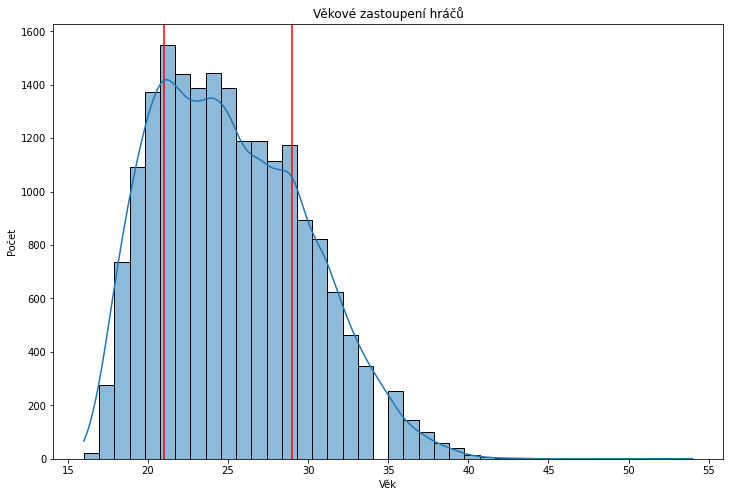

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Věk')
plt.ylabel('Počet')
plt.axvline(df.Age.quantile(0.25),color='red')
plt.axvline(df.Age.quantile(0.75),color='red')
sns.histplot(df_selected.Age,bins=40,kde=True).set_title('Věkové zastoupení hráčů')

V grafu je vyznačen první a třetí kvartil, který značí, kde je největší věkové zastoupení. Medián je pak 25 let.

## Zastoupení hráčů v datasetu podle výšky

Text(0.5, 1.0, 'Výška hráčů')

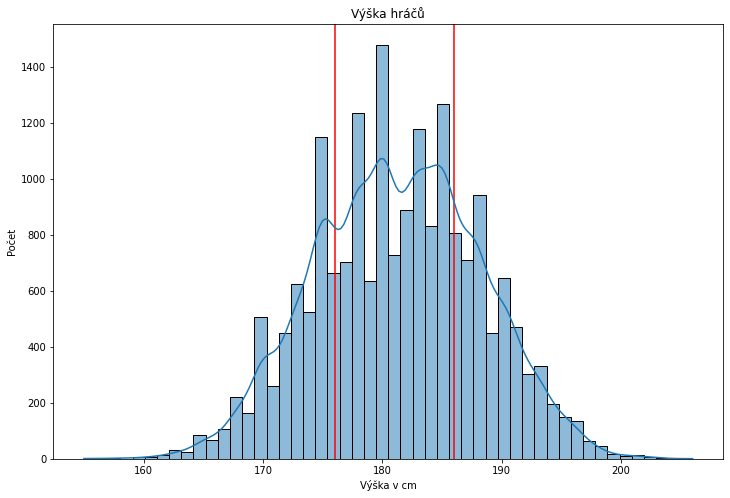

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Výška v cm')
plt.ylabel('Počet')
plt.axvline(df.Height.quantile(0.25),color='red')
plt.axvline(df.Height.quantile(0.75),color='red')
sns.histplot(data=df_selected,x='Height',bins=50,kde=True).set_title('Výška hráčů')

Nejvíce hráčů je vysokých v rozmezí 176-186 cm. Medián je 181cm. V prvním kvartilu jsou hráči do 175 cm, nejmenší hráč má 155 cm. Ve čtvrtém jsou hráči, kteří měří více než 186cm. Nejvyšší hráč má 206 cm.

## Zastoupení hráčů v datasetu podle váhy

Text(0.5, 1.0, 'Váhá hráčů')

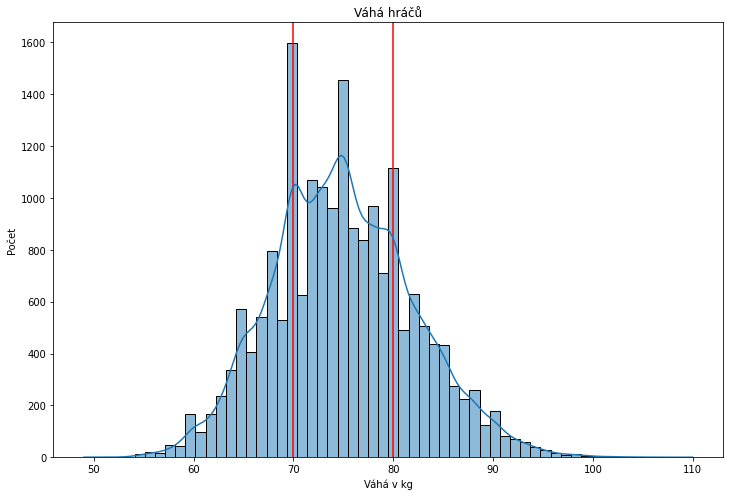

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Váhá v kg')
plt.ylabel('Počet')
plt.axvline(df.Weight.quantile(0.25),color='red')
plt.axvline(df.Weight.quantile(0.75),color='red')
sns.histplot(data=df_selected,x='Weight',bins=60,kde=True).set_title('Váhá hráčů')

Nejvíce hráčů váží v rozmezí 70-80kg cm. Medián je 75kg. V prvním kvartilu jsou hráči do 70kg, nejlehčí hráč má 49 kg. Ve čtvrtém jsou hráči, kteří váží více než 75kg. Nejtěžší hráč má 110 kg.

## Top 10 nejlepších hráčů

In [ ]:
top_10_overall = df_selected.sort_values(by="Overall", ascending=False).head(10)
top_10_overall

,FullName,Age,Height,Weight,Nationality,Club,Overall,Potential,ValueEUR,WageEUR,PreferredFoot,BestPosition
0,Lionel Messi,34,170,72,Argentina,Paris Saint-Germain,93,93,78000000,320000,Left,RW
1,Robert Lewandowski,32,185,81,Poland,FC Bayern München,92,92,119500000,270000,Right,ST
2,C. Ronaldo dos Santos Aveiro,36,187,83,Portugal,Manchester United,91,91,45000000,270000,Right,ST
3,Kylian Mbappé,22,182,73,France,Paris Saint-Germain,91,95,194000000,230000,Right,ST
4,Jan Oblak,28,188,87,Slovenia,Atlético de Madrid,91,93,112000000,130000,Right,GK
5,Kevin De Bruyne,30,181,70,Belgium,Manchester City,91,91,125500000,350000,Right,CM
6,Neymar da Silva Santos Jr.,29,175,68,Brazil,Paris Saint-Germain,91,91,129000000,270000,Right,LW
7,N'Golo Kanté,30,168,70,France,Chelsea,90,90,100000000,230000,Right,CDM
8,Harry Kane,27,188,89,England,Tottenham Hotspur,90,90,129500000,240000,Right,ST
9,Marc-André ter Stegen,29,187,85,Germany,FC Barcelona,90,92,99000000,250000,Right,GK


10 nejlepších hráčů na světě, seřazeno podle sloupce Overall

## Národnost 10 nejlepších hráčů

France       2
Argentina    1
Poland       1
Portugal     1
Slovenia     1
Belgium      1
Brazil       1
England      1
Germany      1
Name: Nationality, dtype: int64


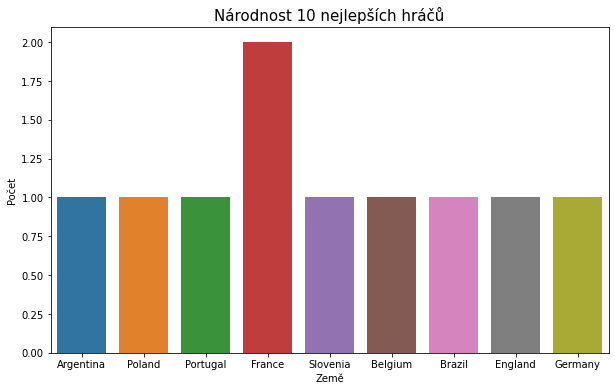

In [ ]:
print(top_10_overall["Nationality"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x = top_10_overall["Nationality"])
plt.title("Národnost 10 nejlepších hráčů", size=15)
plt.xlabel('Země')
plt.ylabel('Počet')
plt.show()

Národnost 10 nejlepších hráčů. Největší zastoupení má Francie a to dvěma hráči.

## Kluby 10 nejlepších hráčů

Paris Saint-Germain    3
FC Bayern München      1
Manchester United      1
Atlético de Madrid     1
Manchester City        1
Chelsea                1
Tottenham Hotspur      1
FC Barcelona           1
Name: Club, dtype: int64


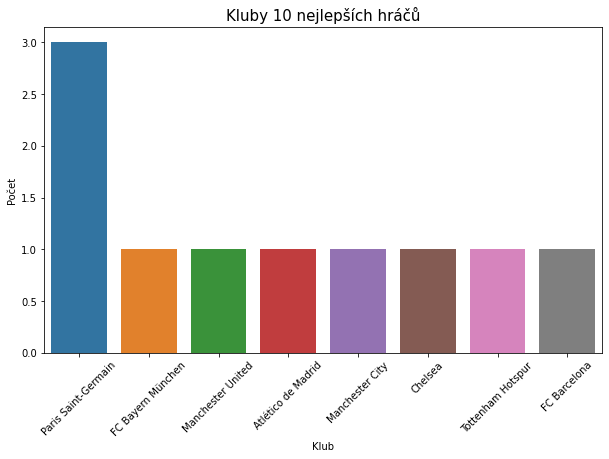

In [ ]:
print(top_10_overall["Club"].value_counts())
plt.figure(figsize=(10,6))
s =sns.countplot(x = top_10_overall["Club"])
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Kluby 10 nejlepších hráčů", size=15)
plt.xlabel('Klub')
plt.ylabel('Počet')
plt.show()

Kluby 10 nejlepších hráčů. Vidíme, že se třemi hráči dominuje Paris Saint-Germain, ostatní pak mají po jednom hráči.

## 10 nejstarších hráčů

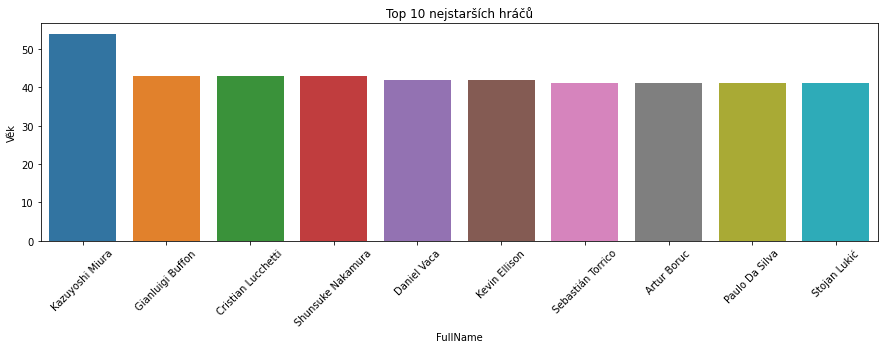

In [ ]:
most_age = df_selected.nlargest(10,'Age')
fig = plt.figure(figsize = (15,4))
s = sns.barplot(data= most_age,x='FullName',y='Age')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title('Top 10 nejstarších hráčů')
plt.ylabel('Věk')
plt.show()

Úplně nejstarší hráč je Kazuyoshi Miura a to se 54 lety. Je to jediný hráč, který má přes 50 let. Druhý Gianluigi Buffon má 44 let.

## 10 nejmladších hráčů

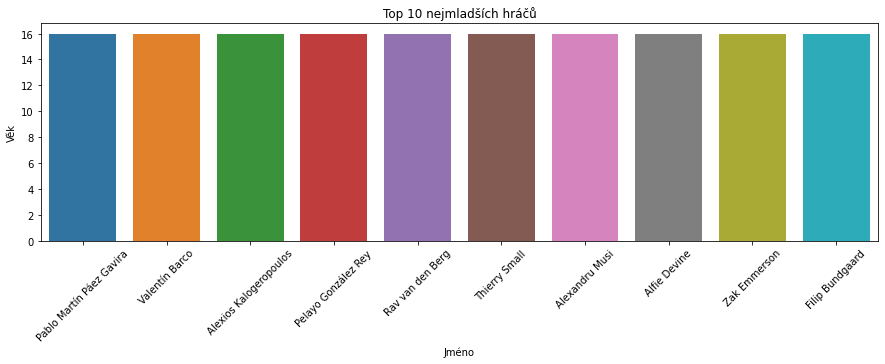

In [ ]:
age = df.nsmallest(10,'Age')
fig = plt.figure(figsize = (15,4))
s = sns.barplot(data= age,x='FullName',y='Age')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title('Top 10 nejmladších hráčů')
plt.ylabel('Věk')
plt.xlabel('Jméno')
plt.show()

Lze vidět, že spoustu hráčů má minimální věk 16 let.

## Zastoupení hráčů podle preferované nohy

In [ ]:
print(df_selected["PreferredFoot"].value_counts())

Right    14591
Left      4565
Name: PreferredFoot, dtype: int64


Z celkového počtu 19156 hráčů je 14591 praváků a 4565 leváků.
Leváci tvoří 31% hráčů

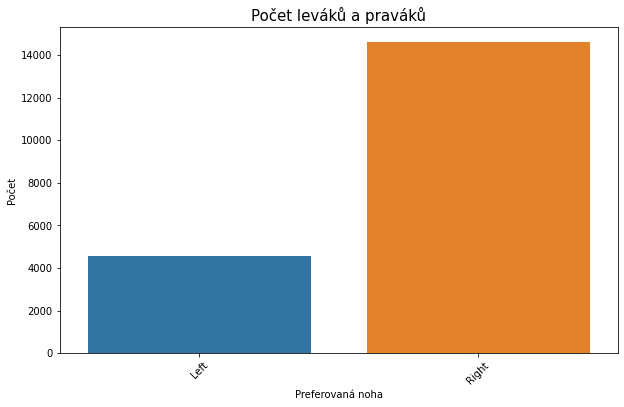

In [ ]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df_selected["PreferredFoot"])
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet leváků a praváků", size=15)
plt.xlabel('Preferovaná noha')
plt.ylabel('Počet')
plt.show()

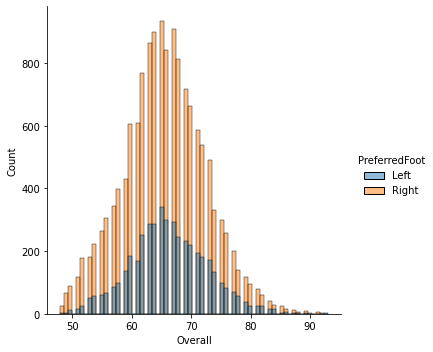

In [ ]:
sns.displot(data=df_selected,x='Overall',hue='PreferredFoot')

Rozložení levonohých a provonohých hráčů podle celkového skóre.

## Jsou levonozí hráči lepší než pravonozí?

In [ ]:
top_100_overall = df_selected.sort_values(by="Overall", ascending=False).head(100)
top_100_overall

,FullName,Age,Height,Weight,Nationality,Club,Overall,Potential,ValueEUR,WageEUR,PreferredFoot,BestPosition
0,Lionel Messi,34,170,72,Argentina,Paris Saint-Germain,93,93,78000000,320000,Left,RW
1,Robert Lewandowski,32,185,81,Poland,FC Bayern München,92,92,119500000,270000,Right,ST
2,C. Ronaldo dos Santos Aveiro,36,187,83,Portugal,Manchester United,91,91,45000000,270000,Right,ST
3,Kylian Mbappé,22,182,73,France,Paris Saint-Germain,91,95,194000000,230000,Right,ST
4,Jan Oblak,28,188,87,Slovenia,Atlético de Madrid,91,93,112000000,130000,Right,GK
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Marco Reus,32,180,71,Germany,Borussia Dortmund,85,85,43000000,95000,Right,CAM
81,Leonardo Bonucci,34,190,85,Italy,Juventus,85,85,17500000,110000,Right,CB
130,Matthias Ginter,27,191,86,Germany,Borussia Mönchengladbach,84,85,42500000,45000,Right,CB
120,Youri Tielemans,24,176,72,Belgium,Leicester City,84,87,57000000,125000,Right,CM


In [ ]:
print(top_100_overall["PreferredFoot"].value_counts())

Right    80
Left     20
Name: PreferredFoot, dtype: int64


Leváci v top 100 tvoří pouze 25%

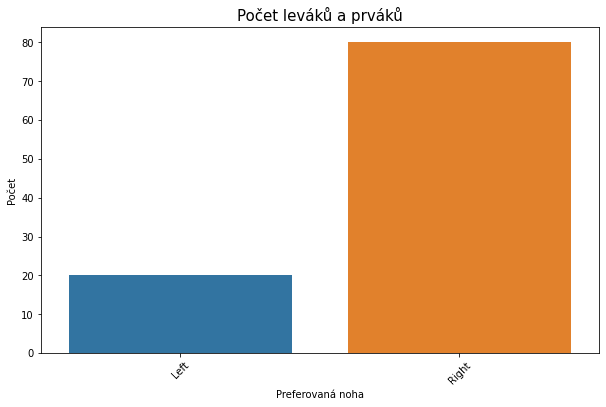

In [ ]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = top_100_overall["PreferredFoot"])
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet leváků a prváků", size=15)
plt.xlabel('Preferovaná noha')
plt.ylabel('Počet')
plt.show()

Nejlepší hráč je sice levák, ale jak vidíme, levonozí hráči tvoří jen 25% hráčů v top 100. Zatímco v celém datasetu leváci tvoří 31%.

## Jaký je rozdíl mezi top 100 hráči a zbytkem?

In [ ]:
top_100_overall.describe() - df_selected.describe()

,Age,Height,Weight,Overall,Potential,ValueEUR,WageEUR
count,-19006.000000,-19006.000000,-19006.000000,-19006.000000,-19006.000000,-1.900600e+04,-19006.000000
mean,3.689450,1.662194,3.622343,22.744931,18.437101,8.317844e+07,193020.955605
std,-0.853091,0.659544,1.901694,-4.990285,-3.799613,2.983075e+07,56406.978137
min,4.000000,10.000000,11.000000,38.000000,37.000000,1.350000e+07,73000.000000
25%,6.000000,3.000000,0.250000,26.000000,21.000000,6.590000e+07,139000.000000
50%,4.000000,2.000000,2.500000,22.000000,18.000000,8.830000e+07,192000.000000
75%,2.000000,2.000000,4.750000,19.000000,16.000000,1.055000e+08,249500.000000
max,-18.000000,-7.000000,-14.000000,9.000000,3.000000,9.950000e+07,160000.000000


Průměrný věk v top 100 oproti všem hráčům je o 3.6 let vyšší, hráči jsou o 1.6cm vyšší a o 3.6kg težší. Což jsou zanedbatelné hodnoty a nehrají příliš velkou roli.

In [ ]:
top_100_overall.describe()

,Age,Height,Weight,Overall,Potential,ValueEUR,WageEUR
count,50.000000,50.00000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,28.860000,182.96000,78.560000,88.400000,89.400000,8.566000e+07,201080.000000
std,3.886187,7.52129,8.960594,1.653691,2.157096,3.527132e+07,71212.771155
min,20.000000,165.00000,60.000000,86.000000,86.000000,1.350000e+07,73000.000000
25%,27.000000,179.00000,70.250000,87.000000,88.000000,6.637500e+07,140000.000000
50%,29.000000,183.00000,77.500000,88.000000,89.000000,8.925000e+07,195000.000000
75%,31.000000,188.00000,84.750000,89.000000,91.000000,1.075000e+08,257500.000000
max,36.000000,199.00000,96.000000,93.000000,95.000000,1.940000e+08,350000.000000


## 10 Nejvíce zastoupených zemí hráči

In [ ]:
top_nationality = df_selected["Nationality"].value_counts().rename_axis('Nationality').reset_index(name='counts')
top_nationality.head(10)

,Nationality,counts
0,England,1712
1,Germany,1214
2,Spain,1079
3,France,978
4,Argentina,946
5,Brazil,895
6,Japan,542
7,Netherlands,437
8,United States,411
9,Poland,403


Nejvíce zastoupenou zemí je Anglie se 1712 hráči. Druhou zemí s největším počtem hráčů je Německo a to s 1214 hráči. Třetí je Španělsko s 1079 hráči. Na čtvrtém místě je Francie s 978 hráči, která má 2 hráče z top deseti.

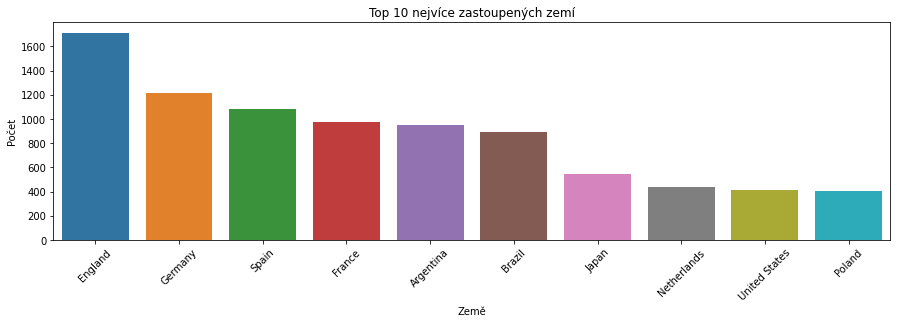

In [ ]:
fig = plt.figure(figsize = (15,4))
s = sns.barplot(data= top_nationality.iloc[:10],x='Nationality',y='counts')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title('Top 10 nejvíce zastoupených zemí')
plt.ylabel('Počet')
plt.xlabel('Země')
plt.show()

## Jak souvisí potencionál s věkem?

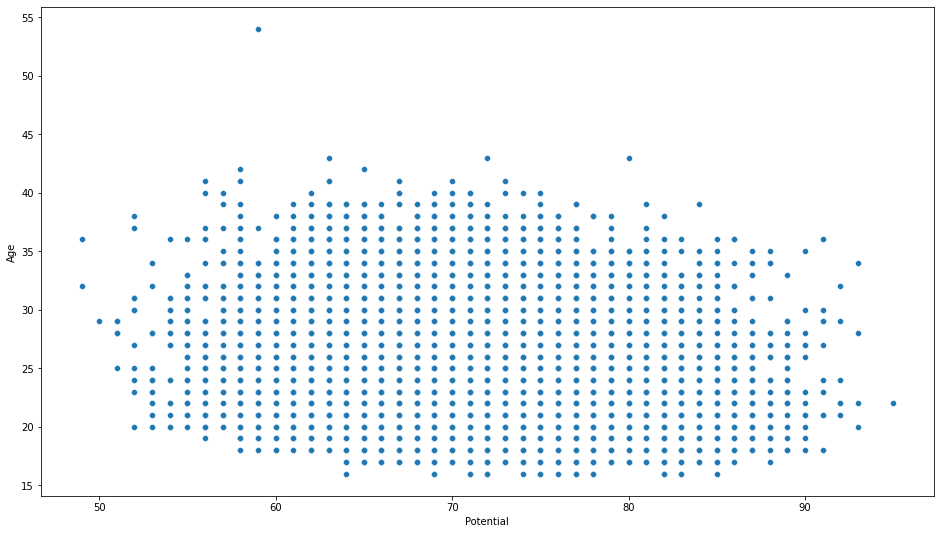

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_selected,x='Potential',y='Age')

Vidíme, že potencionál hráče nijak nesouvisí.

## Jak souvisí hodnota hráče s celkovým skórem?

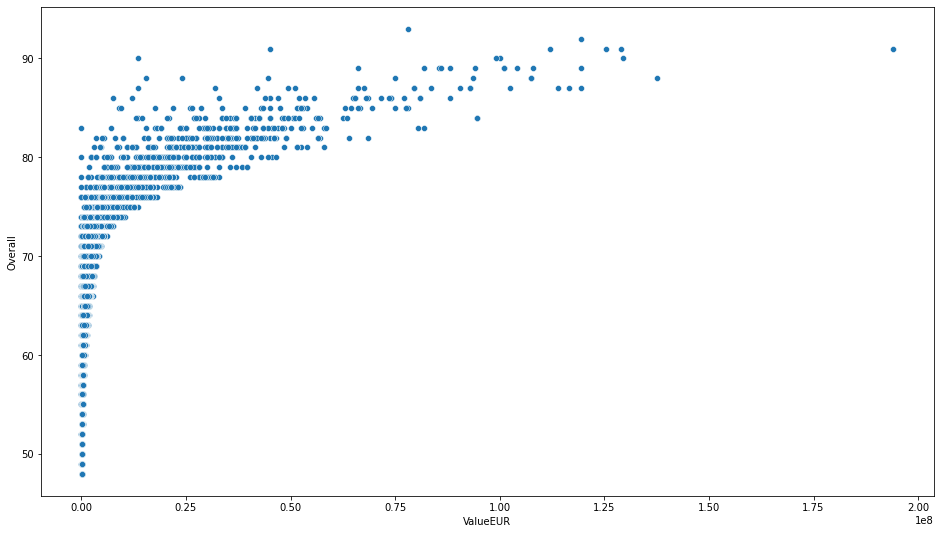

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_selected,x='ValueEUR',y='Overall')

Ač by se mohlo zdát, že čím lepší skóre hráče tím hráč má větší hodnotu. Tak tomu tak vždy není. V grafu lze vidět hráče, kteří mají celkové skóre kolem 90, ale dosahují poloviční někdy i třetinovou hodnotu než hráči, kteří mají dokonce skóre nižší.

## Jak souvisí mzda hráče s celkovým skórem?

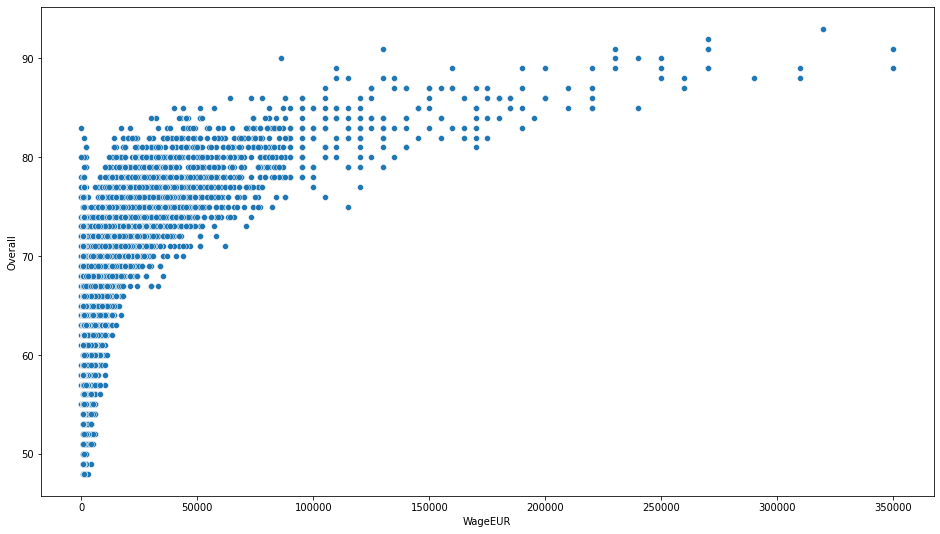

In [ ]:
fig = plt.figure(figsize=(16, 9))

sns.scatterplot(data=df_selected,x='WageEUR',y='Overall')

Tak jak u předchozího grafu ani tady není korelace nijak silná.

## Jak vypadá korelační matice

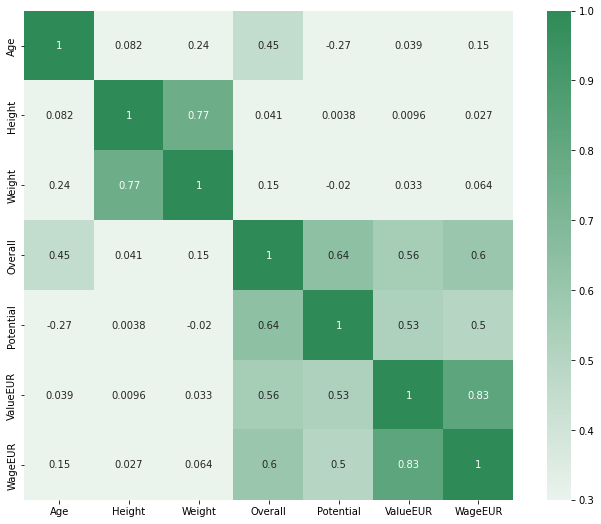

In [ ]:
df_corr = df_selected.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, square=True, cmap=sns.light_palette("seagreen", as_cmap=True), vmin=0.3, annot=True)

Z korelačním matice je vidět, podle očekávání korelaci mezi výškou hráče a jeho váhou. Úplně nejsilnější korelaci maji sloupce WageEUR a ValueEUR, která značí čím větši hodnota hráče tím hráč má větší mzdu.

## Souvislost hodnoty hráče a jeho mzdy

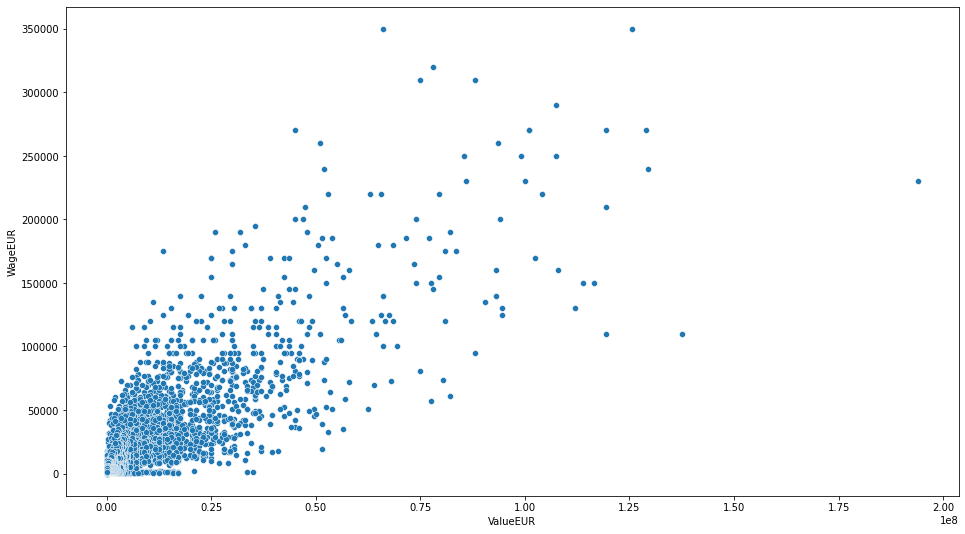

In [ ]:
fig = plt.figure(figsize=(16, 9))

sns.scatterplot(data=df_selected,x='ValueEUR',y='WageEUR')

Z grafu lze korelaci pozorovat.

## Závěr

Z datasetu jsem se dozvěděl:

- Zastoupení hráčů podle jejich věku s tím, že průměrná věk je 25 let
- Zastoupení hráčů podle jejich výšky s tím, že průměrná výška je 181 cm
- Zastoupení hráčů podle jejich váhy s tím, že průměrná váha je 75 kg

- 10 nejlepších hráčů na světě
- Jaké národnosti je 10 nejlepších hráčů
- Jaké kluby vlatní někoho z top 10 a kolik hráčů
- 10 nejstarších hráčů s tím, že nejstarší má 54 let a jako jediný hráč, která má více než 50 let
- 10 nejmladších hráčů s tím, že nejmladší hráči mají 16 let
- Kolik hráčů je leváků a praváků. Z celkového počtu 19156 hráčů je 14591 praváků a 4565 leváků.
Leváci tvoří 31% hráčů
- Jestli jsou levonozí hráči úspěšnější, v top 100 tvoří leváci 25%
- V čem se liší 100 nejlepších hráčů od zbytku
- Které země mají nejvíce hráčů, nejvíce má Anglie 1712 hráčů
- Jak souvisí potenciál hráče s jeho věkem
- Jak souvisí hodnota hráče s jeho celkovým skórem
- Jak souvisí mzda hráče s jeho celkovým skórem
- Jak vypadá korelační matice
- Jak souvisí hodnota hráče s jeho mzdou






